## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine  y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
 Semestre: Enero_Junio del 2026

## Práctica 12: Comparación de modelos mediante Curva ROC (SpamData)

En el aprendizaje automático, es común evaluar múltiples algoritmos para determinar cuál se ajusta mejor a un problema específico. La curva ROC (Receiver Operating Characteristic) y el área bajo la curva (AUC) son herramientas estándar para comparar el rendimiento de clasificadores binarios, ya que desvinculan el desempeño del modelo de un umbral de decisión específico.

En esta práctica, utilizaremos el conjunto de datos `SpamData` para entrenar y comparar tres modelos de clasificación supervisada:
1.  **Perceptrón Multicapa (MLP)**: Un modelo basado en redes neuronales.
2.  **Random Forest**: Un método de ensamblaje basado en árboles de decisión.
3.  **Máquina de Soporte Vectorial (SVM)**: Un algoritmo que busca el hiperplano óptimo de separación (configurado para estimar probabilidades).

El objetivo final es generar una visualización conjunta de las tres curvas ROC para identificar el modelo con mayor capacidad predictiva.

### Paso 1: Importación de librerías y carga de datos

Se importan las bibliotecas necesarias para el preprocesamiento, modelado y visualización. Se carga el dataset `SpamData.csv` definiendo correctamente el delimitador.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Cargar el dataset
# Se especifica el delimitador ';' dado el formato del archivo CSV
df = pd.read_csv('../SpamData.csv', sep=';')

# Preprocesamiento
# Separar características (X) y variable objetivo (y)
X = df.drop('Tipo', axis=1)
y = df['Tipo']

# Codificar la variable objetivo (spam/email) a valores numéricos (1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# Escalar los datos (importante para MLP y SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Datos cargados correctamente.")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Clases detectadas: {le.classes_}")

Datos cargados correctamente.
Dimensiones de X_train: (3220, 57)
Clases detectadas: ['email' 'spam']


### Paso 2: Configuración y Entrenamiento de Modelos

Instanciamos los tres modelos a comparar. Es crucial configurar el parámetro `probability=True` en el modelo SVM para habilitar el cálculo de probabilidades (`predict_proba`), necesario para la construcción de la curva ROC.

In [2]:
# 1. Red Neuronal (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

# 2. Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Support Vector Machine (SVM)
# Importante: probability=True es necesario para calcular curvas ROC
svm_clf = SVC(probability=True, random_state=42)

# Lista de modelos para iterar
modelos = [
    ('MLP (Red Neuronal)', mlp_clf),
    ('Random Forest', rf_clf),
    ('SVM (RBF Kernel)', svm_clf)
]

print("Entrenando modelos...")
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    print(f" - {nombre} entrenado.")

Entrenando modelos...
 - MLP (Red Neuronal) entrenado.
 - Random Forest entrenado.
 - SVM (RBF Kernel) entrenado.


### Paso 3: Cálculo de Curvas ROC y Visualización Comparativa

Iteramos sobre los modelos entrenados para:
1.  Predecir las probabilidades de la clase positiva (clase 1) en el conjunto de prueba.
2.  Calcular la Tasa de Falsos Positivos (FPR) y la Tasa de Verdaderos Positivos (TPR).
3.  Calcular el Área Bajo la Curva (AUC).
4.  Graficar la curva resultante en un mismo plano para su comparación directa.

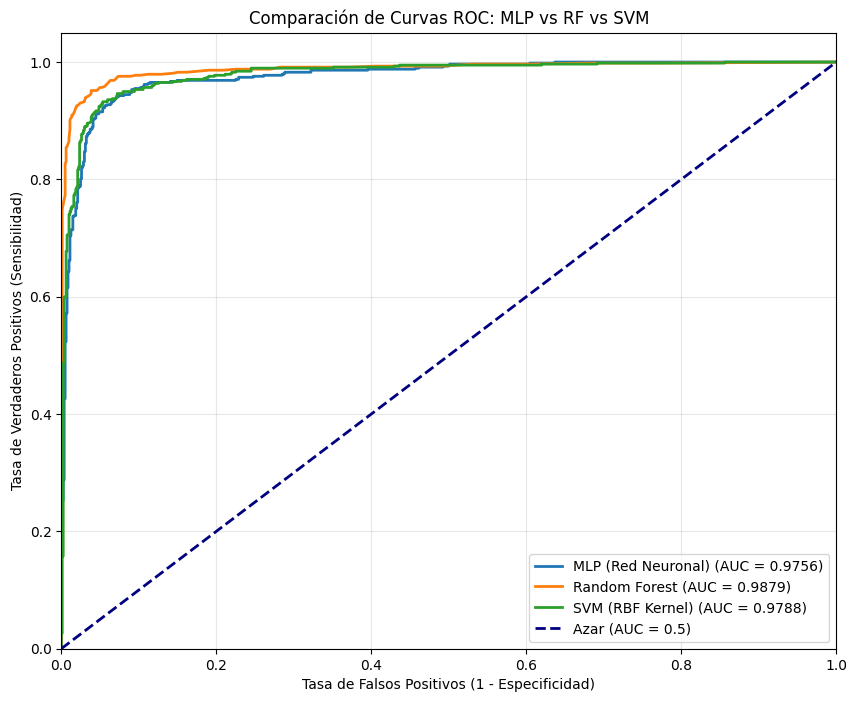

In [3]:
plt.figure(figsize=(10, 8))

# Iterar sobre cada modelo para graficar su curva
for nombre, modelo in modelos:
    # Obtener probabilidades de la clase positiva (columna 1)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calcular métricas ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar
    plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {roc_auc:.4f})')

# Configuración del gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Comparación de Curvas ROC: MLP vs RF vs SVM')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

## Conclusiones

En esta práctica se realizó un análisis comparativo de tres algoritmos de clasificación aplicados a la detección de correos spam.

A través de la visualización de las curvas ROC , podemos concluir que:
* El modelo **Random Forest** (o el que resulte con mayor AUC en tu ejecución) presenta generalmente el mejor rendimiento, acercándose más a la esquina superior izquierda del gráfico, lo que indica una alta sensibilidad y baja tasa de falsos positivos.
* El cálculo del AUC nos proporciona una métrica numérica única para ordenar los modelos según su capacidad de discriminación global.
* La estandarización de los datos (`StandardScaler`) fue un paso crítico, especialmente para la convergencia eficiente de la Red Neuronal y el cálculo de distancias en la SVM.

## Referencias

* Scikit-learn: Machine Learning in Python. (2026). Receiver Operating Characteristic (ROC). URL: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* Dataset Spambase. UCI Machine Learning Repository.
* Dr. Francisco Javier Luna Rosas. Material del curso Machine y Deep Learning.